# Nadhya Hassni
# 09011381722090
# SK5U

# Implementasi Logika Fuzzy Mamdani pada Sistem Rekomendasi Perpanjangan Kontrak kerja

 <div class="alert alert-warning">
<div>
    
   Belum adanya sistem pendukung keputusan yang menghitung secara komputerisasi dalam penentuan perpanjang kontrak karyawan pada PT. Graha Prima perkasa sehingga perusahaan mengalami kendala untuk menentukan perpanjang kontrak setiap periodeny, untuk menyelesaikan permasalahan tersebut maka dibuatlah sistem penpendukung pengambil keputusan yang menggunakan logika fuzzy metode mamdani, Logika fuzzy merupakan salah satu ilmu yang dapat menganalisa ketidakpastian,  pada penelitian ini menggunakan logika fuzzy.metode mamdani. untuk mendapatkan keluaran dari metode ini diperlukan 4 tahapan yakni; Pembentukan himpunan fuzzy, Aplikasi fungsi implikasi, Komposisi aturan, Defuzzifikasi dan kriteria yang digunakan adalah prestasi, dan kedisiplinan dengan menggunakan tiga nilai linguistik pada setiap variabelnya dari hasil penlitian yang telah dilakukan, metode mamdani dapat digunakan sebagai rekomendasi perpanjajang kontrak kerja karyawan. </li>

        

# Import Library

In [20]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt

langkah yang dilakukan diatas adalah langka yang digunakan untuk mengiport library yang digunakan.
library - library yang digunakan :
1. Numpy : library Numpy memiliki kegunaan untuk operasi vektor dan matriks. 
2. Scikit Fuzzy : Library ini adalah library untuk Operasi Matematika yang berfungsi untuk mencari nilai tengah atau nilai terbaik dari suatu perhitungan 
3. Matplotlib : Berfungsi untuk menampilkan gambar atau grafik dari suatu coding/perhitungan dalam cell python yang sedang berjalan 

======================================================================================================================
# Membership Funcion
    Definisi: fungsi keanggotaan untuk himpunan fuzzy A pada alam semesta wacana X didefinisikan sebagai µA: X → [0,1], di mana setiap elemen X dipetakan ke nilai antara 0 dan 1. Nilai ini, yang disebut nilai keanggotaan atau tingkat keanggotaan, mengkuantifikasi tingkat keanggotaan elemen di X ke set fuzzy A.

    Fungsi keanggotaan memungkinkan kita untuk menggambarkan secara grafis set fuzzy. Sumbu x mewakili alam semesta wacana, sedangkan sumbu y mewakili derajat keanggotaan dalam interval [0,1].

    Fungsi sederhana digunakan untuk membangun fungsi keanggotaan. Karena kami mendefinisikan konsep fuzzy, menggunakan fungsi yang lebih kompleks tidak menambah presisi.

    salah satu fungsi keanggotaan yang digunakan pada tugas ini adalah fungsi keanggotaan segitiga

![title](img/materi.png)

=======================================================================================================================

    INPUT :

        1. PRESTASI
        SKALA(1-5)
        2. KEDISIPLINAN
        SKALA(1-10)

    OUTPUT :

        3. REKOMENDASI PERPANJANGAN KONTRAK KERJA
        SKALA(1-10)

In [21]:
#plot awal
prestasi = ctrl.Antecedent(np.arange(1, 7, 0.1), 'prestasi')
kedisiplinan = ctrl.Antecedent(np.arange(1, 13, 0.1), 'kedisiplinan')
output = ctrl.Consequent(np.arange(0, 12, 0.1), 'output')

coding diatas merupakan plot utama yang digunakan untuk mengeluarkan grafik dan hasil defuzzyfikasi

# PRESTASI ( 1 - 5 )

    Klasifikasi :
    
           TIDAK : 1-2.5
    
           MENCAPAI : 1-5
    
           MELAMPAUI : 3.5-5
           
 



======================================================================================================================

\begin{equation}
 prestasi ['tidak mencapai'] = \mu tidak(x)=\begin{cases}
    0, & \text{$x\leq a$}.\\
    \frac {2.5 - x}{2.5 - 0} , & \text{$m \leq x \leq b$}.\\
    0, & \text{$b\leq x$}.
  \end{cases}  
\end{equation}

Text(0.5, 1.0, 'prestasi tidak')

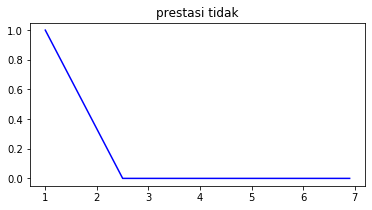

In [67]:
#PRESTASI TIDAK MENCAPAI
prestasi_x = np.arange(1, 7, 0.1)
prestasi['tidak'] = fuzz.trimf(prestasi.universe, [1,1,2.5])

prestasi_tidak= fuzz.trimf(prestasi_x,[1,1,2.5])
fig, (ax0) = plt.subplots(nrows=1,figsize=(6,3))
ax0.plot(prestasi_x,prestasi_tidak,'blue')
ax0.set_title('prestasi tidak')

======================================================================================================================
\begin{equation}
  prestasi['mencapai'] = \mu mencapai(x)=\begin{cases}
    0, & \text{$x\leq a$}.\\
    \frac{x - 1}{3 - 1} , & \text{$a \leq x \leq m$}.\\
    0 , & \text{$b \leq x $}.\\
  \end{cases}
\end{equation}

Text(0.5, 1.0, 'prestasi mencapai')

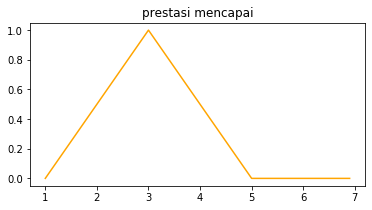

In [66]:
#PRESTASI MENCAPAI
prestasi['mencapai'] = fuzz.trimf(prestasi.universe, [1,3,5])

prestasi_mencapai= fuzz.trimf(prestasi_x,[1,3,5])
fig, (ax0) = plt.subplots(nrows=1,figsize=(6,3))
ax0.plot(prestasi_x,prestasi_mencapai,'orange')
ax0.set_title('prestasi mencapai')

=======================================================================================================================
\begin{equation}
    prestasi['melampaui'] = \mu melampaui(x)=\begin{cases}
    0, & \text{$x \leq a$}.\\
    \frac{x - 3,5}{5 - 3,5} , & \text{$a \leq x \leq m$}.\\
    0 , & \text{$b \leq x $}.\\
  \end{cases}
\end{equation}

Text(0.5, 1.0, 'prestasi melampaui')

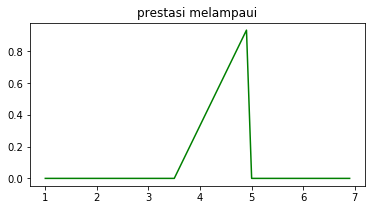

In [65]:
#PRESTASI MELAMPAUI
prestasi['melampaui'] = fuzz.trimf(prestasi.universe, [3.5,5,5])

prestasi_melampaui= fuzz.trimf(prestasi_x,[3.5,5,5])
fig, (ax0) = plt.subplots(nrows=1,figsize=(6,3))
ax0.plot(prestasi_x,prestasi_melampaui,'green')
ax0.set_title('prestasi melampaui')

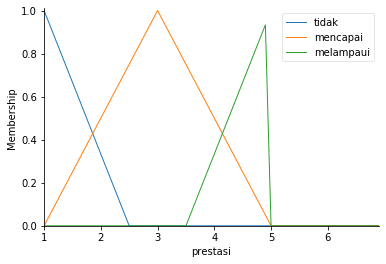

In [79]:
#plot saat ke 3 indikator prestasi digabungkan

prestasi['tidak'] = fuzz.trimf(prestasi.universe,[1,1,2.5])
prestasi['mencapai'] = fuzz.trimf(prestasi.universe,[1,3,5])
prestasi['melampaui'] = fuzz.trimf(prestasi.universe,[3.5,5,5])
prestasi.view()

=====================================================================================================================
# KEDISIPLINAN ( 1 - 10 )

    Klasifikasi :
    
        KURANG : 1-4
    
        CUKUP : 1-9
    
        SANGAT : 6-10
======================================================================================================================
        
\begin{equation}
kedisiplinan ['kurang disiplin'] = \mu kurang(x)=\begin{cases}
    0, & \text{$x\leq a$}.\\
    \frac {4 - x}{4 - 0} , & \text{$m \leq x \leq b$}.\\
    0, & \text{$b\leq x$}.\\
  \end{cases}
\end{equation}


Text(0.5, 1.0, 'prestasi kurang')

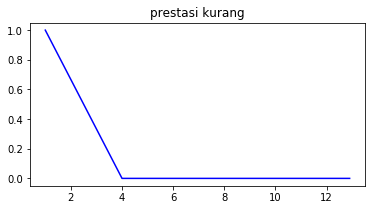

In [64]:
#plot kurang disiplin

kedisiplinan_x = np.arange(1, 13, 0.1)
kedisiplinan['kurang'] = fuzz.trimf(kedisiplinan.universe, [1,1,4])

kedisiplinan_kurang= fuzz.trimf(kedisiplinan_x,[1,1,4])
fig, (ax0) = plt.subplots(nrows=1,figsize=(6,3))
ax0.plot(kedisiplinan_x,kedisiplinan_kurang,'blue')
ax0.set_title('prestasi kurang')

=====================================================================================================================-
\begin{equation}
  kedisiplinan ['cukup'] = \mu cukup(x)=\begin{cases}
    0, & \text{$x\leq a$}.\\
    \frac {x - 1}{5 - 1} , & \text{$a \leq x \leq m$}.\\
    0 , & \text{$b \leq x $}.\\
  \end{cases}
\end{equation}



Text(0.5, 1.0, 'kedisiplinan cukup')

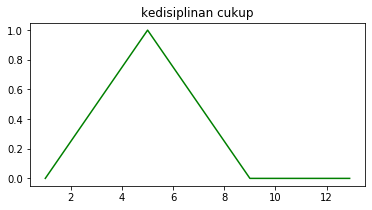

In [69]:
#plot cukup disiplin

kedisiplinan_x = np.arange(1, 13, 0.1)
kedisiplinan['cukup'] = fuzz.trimf(kedisiplinan.universe, [1,5,9])

kedisiplinan_cukup= fuzz.trimf(kedisiplinan_x,[1,5,9])
fig, (ax0) = plt.subplots(nrows=1,figsize=(6,3))
ax0.plot(kedisiplinan_x,kedisiplinan_cukup,'green')
ax0.set_title('kedisiplinan cukup')

=======================================================================================================================


\begin{equation}
   kedisiplinan['sangat disiplin'] = \mu sangat(x)=\begin{cases}
    0, & \text{$x \leq a$}.\\
    \frac{(x- 5)}  {(m - 5)} , & \text{$a5 \leq x \leq m$}.\\
    0 , & \text{$b \leq x $}.\\
  \end{cases}\\
\end{equation}

Text(0.5, 1.0, 'kedisiplinan sangat')

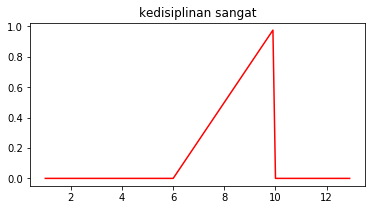

In [70]:
#plot sangat disiplin

kedisiplinan['sangat'] = fuzz.trimf(kedisiplinan.universe, [6,10,10])

kedisiplinan_sangat= fuzz.trimf(kedisiplinan_x,[6,10,10])
fig, (ax0) = plt.subplots(nrows=1,figsize=(6,3))
ax0.plot(kedisiplinan_x,kedisiplinan_sangat,'red')
ax0.set_title('kedisiplinan sangat')

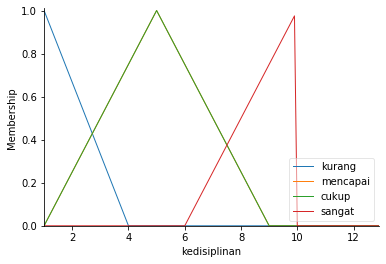

In [54]:
#plot saat ke 3 indikator kediplinan digabungkan

kedisiplinan['kurang'] = fuzz.trimf(kedisiplinan.universe,[1,1,4])
kedisiplinan['cukup'] = fuzz.trimf(kedisiplinan.universe,[1,5,9])
kedisiplinan['sangat'] = fuzz.trimf(kedisiplinan.universe,[6,10,10])
kedisiplinan.view()

#     REKOMENDASI PERPANJANGAN KONTRAK KERJA ( 1-10 )

    Klasifikasi :
    
        tidak diperpanjang : 1-4
    
        Dipertimbangkan :2-6
    
        perpanjang : 5-10
     

=======================================================================================================================
\begin{equation}
output ['tidak diperpanjang'] = \mu tidak perpanjang(x)=\begin{cases}
    0, & \text{$x\leq a$}.\\
    \frac {x - 1}{m - 1 }, & \text{$a \leq x \leq m$}.\\
    0, & \text{$b\leq x$}.\\
  \end{cases}
  \end{equation}


Text(0.5, 1.0, 'tidak diperpanjang')

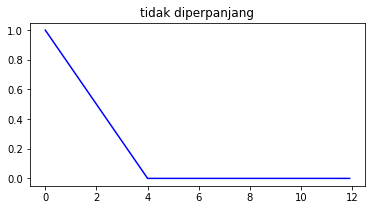

In [59]:
#plot output tidak diperpanjang

output_x = np.arange(0, 12, 0.1)
output['tidak diperpanjang'] = fuzz.trimf(output.universe, [0,0,4])

output_tidak= fuzz.trimf(output_x,[0,0,4])
fig, (ax0) = plt.subplots(nrows=1,figsize=(6,3))
ax0.plot(output_x,output_tidak,'blue')
ax0.set_title('tidak diperpanjang')

=======================================================================================================================

\begin{equation}
output ['dipertimbangkan'] = \mu pertimbangkan(x)=\begin{cases}
    0, & \text{$x\leq a$}.\\
    \frac {6 - x}{6 - m }, & \text{$m\leq x \leq b$}.\\
    0, & \text{$b\leq x$}.\\
     \end{cases}
  \end{equation}

Text(0.5, 1.0, 'dipertimbangkan')

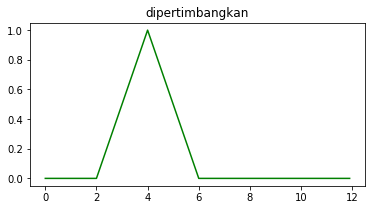

In [76]:
#plot output dipertimbangkan

output['tidak diperpanjang'] = fuzz.trimf(output.universe, [2,4,6])

output_dipertimbangkan= fuzz.trimf(output_x,[2,4,6])
fig, (ax0) = plt.subplots(nrows=1,figsize=(6,3))
ax0.plot(output_x,output_dipertimbangkan,'green')
ax0.set_title('dipertimbangkan')



 ======================================================================================================================

\begin{equation}
output ['diperpanjang'] = \mu perpanjang(x)=\begin{cases}
    0, & \text{$x\leq a$}.\\
    \frac {x - 5}{m - 5 }, & \text{$a \leq x \leq m$}.\\
    0, & \text{$b\leq x$}.
  \end{cases}
  \end{equation}

Text(0.5, 1.0, 'diperpanjang')

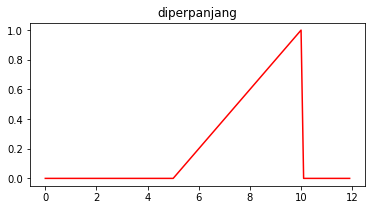

In [75]:
#plot output diperpanjang

output['diperpanjang'] = fuzz.trimf(output.universe, [5,10,10])

output_diperpanjang= fuzz.trimf(output_x,[5,10,10])
fig, (ax0) = plt.subplots(nrows=1,figsize=(6,3))
ax0.plot(output_x,output_diperpanjang,'red')
ax0.set_title('diperpanjang')


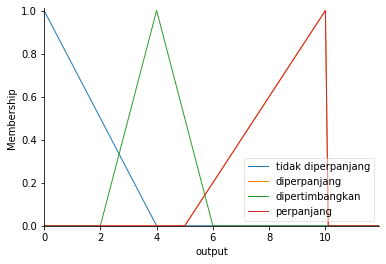

In [82]:
#plot saat ke 3 keluarandigabungkan

output['tidak diperpanjang'] = fuzz.trimf(output.universe,[0,0,4])
output['dipertimbangkan'] = fuzz.trimf(output.universe,[2,4,6])
output['perpanjang'] = fuzz.trimf(output.universe,[5,10,10])
output.view()

====================================================================================================================

In [83]:
#NILAI INPUTAN
Tpres_level_lo = fuzz.interp_membership(Tpres, Tpres_lo, 4)
Tpres_level_md = fuzz.interp_membership(Tpres, Tpres_md, 4)
Tpres_level_hi = fuzz.interp_membership(Tpres, Tpres_hi, 4)

Tked_level_lo = fuzz.interp_membership(Tked, Tked_lo, 8)
Tked_level_md = fuzz.interp_membership(Tked, Tked_md, 8)
Tked_level_hi = fuzz.interp_membership(Tked, Tked_hi, 8)

coding diatas digunakan untuk menjalankan output dan derajat keanggotanan min dan max

====================================================================================================================
# RULE BASE

    PERMISALAN DALAM PENENTUAN  RULE BASE


    DIKETAHUI :


    3 VARIABEL dengan skala 1-15

        TIDAK / KURANG dengan skala 1-5
    
        MENCAPAI / CUKUP dengan skala 6-10
    
        MELAMPAUI / SANGAT dengan skala 11-15
    
    Rumus :

 
$$\frac{(P1 + P2)}{2}$$
    
====================================================================================================================
    TIDAK– KURANG :		
 
$$\frac{(5 + 5)}{2}= 5 = TIDAK DI PERPANJANG$$		

====================================================================================================================

    MENCAPAI – CUKUP :
$$\frac {(10+ 8)}{2}=9=DIPERTIMBANGKAN$$

=====================================================================================================================


    TIDAK – CUKUP/	MENCAPAI-KURANG :				
$$\frac{(5 + 10)}{2}=7.5=DIPERTIMBANGKAN$$	

======================================================================================================================

    MELAMPAUI – CUKUP / MENCAPAI – SANGAT :

$$\frac{(10 + 15)}{2}=12.5=DIPERPANJANG$$

======================================================================================================================


    TIDAK – SANGAT /MELAMPAUI-KURANG:				
$$\frac{(5 + 15)}{2}=10=DIPERTIMBANGKAN$$


=======================================================================================================================
 	
    MELAMPAUI – SANGAT :	
$$\frac{(12+ 15)}{2}=13.5=DIPERPANJANG$$

=======================================================================================================================

    HASIL
![title](img/rulebase.png)

C:\Users\User\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
C:\Users\User\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:676: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cb.iterable(node_size):  # many node sizes


(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x234038a79b0>)

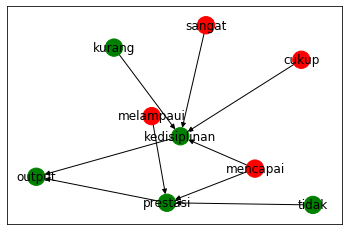

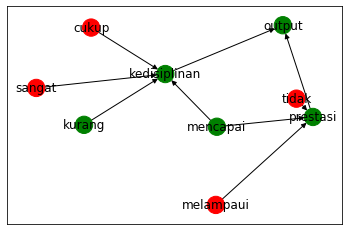

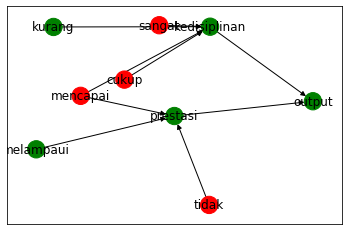

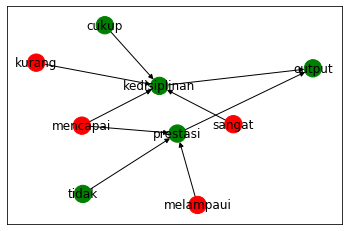

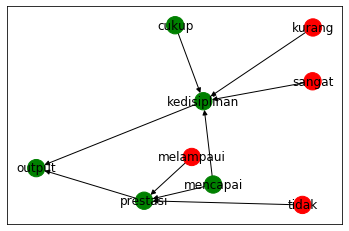

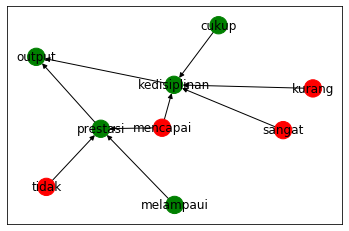

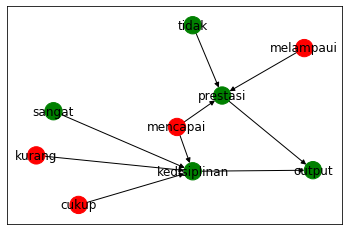

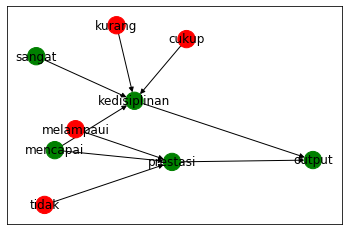

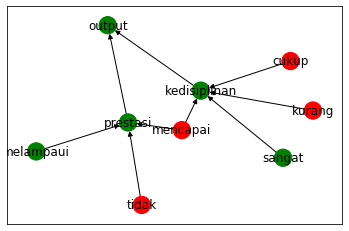

In [85]:
#OPERASI LOGIKA FUZZY DAN IMPLIKASI (RULE BASE)
rule1 = ctrl.Rule(prestasi['tidak'] & kedisiplinan['kurang'], output['tidak diperpanjang'])
rule2 = ctrl.Rule(prestasi['mencapai'] & kedisiplinan['kurang'], output['dipertimbangkan'])
rule3 = ctrl.Rule(prestasi['melampaui'] & kedisiplinan['kurang'], output['dipertimbangkan'])
rule4 = ctrl.Rule(prestasi['tidak'] & kedisiplinan['cukup'],output['dipertimbangkan'])
rule5 = ctrl.Rule(prestasi['mencapai'] & kedisiplinan['cukup'],output ['dipertimbangkan'])
rule6 = ctrl.Rule(prestasi['melampaui'] & kedisiplinan['cukup'], output['perpanjang'])
rule7 = ctrl.Rule(prestasi['tidak'] & kedisiplinan['sangat'], output['dipertimbangkan'])
rule8 = ctrl.Rule(prestasi['mencapai'] & kedisiplinan['sangat'], output['perpanjang'])
rule9 = ctrl.Rule(prestasi['melampaui'] & kedisiplinan['sangat'],output['perpanjang'])


rule1.view_n()
rule2.view_n()
rule3.view_n()
rule4.view_n()
rule5.view_n()
rule6.view_n()
rule7.view_n()
rule8.view_n()
rule9.view_n()

In [90]:
#plot untuk mengeluarkan frafik output fungsi min dan max

Tpres = np.arange(1, 7, 0.01)
Tked = np.arange(1, 13, 0.01)
Tout  = np.arange(0, 12, 0.01)

Tpres_lo = fuzz.trimf(Tpres,[1,1,2.5])
Tpres_md = fuzz.trimf(Tpres,[1,3,5])
Tpres_hi = fuzz.trimf(Tpres,[3.5,5,5])

Tked_lo = fuzz.trimf(Tked,[0,0,4])
Tked_md = fuzz.trimf(Tked,[1,5,9])
Tked_hi = fuzz.trimf(Tked,[6,10,10])

Tout_lo = fuzz.trimf(Tout,[1,1,4])
Tout_md = fuzz.trimf(Tout,[2,4,6])
Tout_hi = fuzz.trimf(Tout,[5,7.5,10])



In [91]:
#FUNGSI IMPLIKASI MIN (MAMDANI METHOD) DAN FUNGSI MIN UNTUK LOGIKA "AND" 
active_rule1 = np.fmin(Tpres_level_lo, Tked_level_lo)
Tout_activation_lo = np.fmin(active_rule1,Tout_lo)

active_rule2 = np.fmin(Tpres_level_lo, Tked_level_md)
Tout_activation_md = np.fmin(active_rule2,Tout_md)

active_rule3 = np.fmin(Tpres_level_lo, Tked_level_hi)
Tout_activation_hi = np.fmin(active_rule3,Tout_md)

active_rule4 = np.fmin(Tpres_level_md, Tked_level_lo)
Tout_activation_lo2 = np.fmin(active_rule4,Tout_md)

active_rule5 = np.fmin(Tpres_level_md, Tked_level_md)
Tout_activation_md2 = np.fmin(active_rule5,Tout_md)

active_rule6 = np.fmin(Tpres_level_md, Tked_level_hi)
Tout_activation_hi2 = np.fmin(active_rule6,Tout_hi)

active_rule7 = np.fmin(Tpres_level_hi, Tked_level_lo)
Tout_activation_lo3 = np.fmin(active_rule7,Tout_md)

active_rule8 = np.fmin(Tpres_level_hi, Tked_level_md)
Tout_activation_md3 = np.fmin(active_rule8,Tout_hi)

active_rule9 = np.fmin(Tpres_level_hi, Tked_level_hi)
Tout_activation_hi3 = np.fmin(active_rule9,Tout_hi)

Tout0 = np.zeros_like(Tout)

coding diatas dugunakan untuk mengaktifkan fungsi min untuk mengeluarkan grafik ouput min

======================================================================================================================

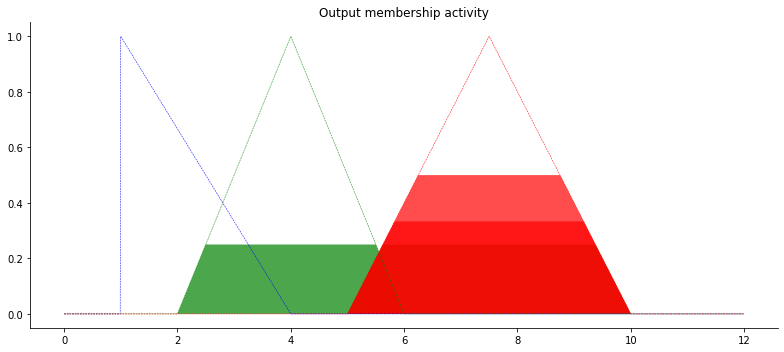

In [92]:
#MENAMPILKAN GRAFIK OUTPUT
fig, ax0 = plt.subplots(figsize=(11,5))

ax0.fill_between(Tout,Tout0, Tout_activation_lo, facecolor='b', alpha=0.7)
ax0.fill_between(Tout, Tout0, Tout_activation_lo2, facecolor='b', alpha=0.7)
ax0.fill_between(Tout, Tout0, Tout_activation_lo3, facecolor='b', alpha=0.7)
ax0.plot(Tout, Tout_lo, 'b', linewidth=0.5, linestyle='--', )

ax0.fill_between(Tout, Tout0, Tout_activation_md, facecolor='g', alpha=0.7)
ax0.fill_between(Tout, Tout0, Tout_activation_md2, facecolor='g', alpha=0.7)
ax0.fill_between(Tout, Tout0, Tout_activation_md3, facecolor='g', alpha=0.7)
ax0.plot(Tout, Tout_md, 'g', linewidth=0.5, linestyle='--')

ax0.fill_between(Tout, Tout0, Tout_activation_hi, facecolor='r', alpha=0.7)
ax0.fill_between(Tout, Tout0, Tout_activation_hi2, facecolor='r', alpha=0.7)
ax0.fill_between(Tout, Tout0, Tout_activation_hi3, facecolor='r', alpha=0.7)
ax0.plot(Tout, Tout_hi, 'r', linewidth=0.5, linestyle='--')
ax0.set_title('Output membership activity')

for ax in (ax0,):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()

plt.tight_layout()

In [93]:
#AGGREGASI DENGAN FUNGSI MAX
aggregated1 = np.fmax(Tout_activation_hi,
                     np.fmax(Tout_activation_hi2, Tout_activation_hi3))

aggregated2 = np.fmax(Tout_activation_md,
                      np.fmax(Tout_activation_md2, Tout_activation_md3))

aggregated3 = np.fmax(Tout_activation_lo,
                     np.fmax(Tout_activation_lo2, Tout_activation_lo3))

aggregated = np.fmax(aggregated1,
                     np.fmax(aggregated2, aggregated3))
                      
T_out = fuzz.defuzz(Tout, aggregated, 'centroid')
Tout_activation = fuzz.interp_membership(Tout, aggregated, T_out)

coding diatas untuk mengkatifkan fungsi max dan mengeluarkan grafik max

=======================================================================================================================

Text(0.5, 1.0, 'Aggregated membership and result (line)')

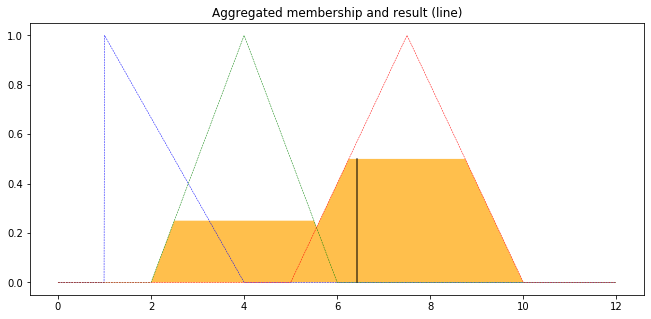

In [94]:
fig, ax0 = plt.subplots(figsize=(11, 5))

ax0.plot(Tout, Tout_lo, 'b', linewidth=0.5, linestyle='--', )
ax0.plot(Tout, Tout_md, 'g', linewidth=0.5, linestyle='--')
ax0.plot(Tout, Tout_hi, 'r', linewidth=0.5, linestyle='--')
ax0.fill_between(Tout, Tout0, aggregated, facecolor='Orange', alpha=0.7)
ax0.plot([T_out, T_out], [0, Tout_activation], 'k', linewidth=1.5, alpha=0.7)
ax0.set_title('Aggregated membership and result (line)')

# DEFUZZYFIKASI

In [95]:
#NILAI OUTPUT 
layak_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9])
layakk = ctrl.ControlSystemSimulation(layak_ctrl)

layakk.input['prestasi'] = 4
layakk.input['kedisiplinan'] = 8

layakk.compute()
print (layakk.output['output'])

6.84157003497147


# HITUNG MANUAL

# DERAJAT KEANGGOTAAN


    PRESTASI
    NILAI INPUT = 3

\begin{equation}
 prestasi ['tidak mencapai'] = \mu tidak(x)=\begin{cases}
    0, & \text{$x\leq a$}.\\
    \frac {2.5 - x}{2.5 - 0} , & \text{$m \leq x \leq b$}.\\
    0, & \text{$b\leq x$}.
  \end{cases}
\end{equation}

    TIDAK = 0 (Karena nilai input yang digunakan tidak memotong fungsi segitiga tidak mencapai)

=======================================================================================================================
   
   
    Mencapai
   \begin{equation}
  prestasi['mencapai'] = \mu mencapai(x)=\begin{cases}
    0, & \text{$x\leq a$}.\\
    \frac{x - 1}{3 - 1} , & \text{$a \leq x \leq m$}.\\
    0 , & \text{$b \leq x $}.\\
  \end{cases}
\end{equation}
    
$$ a=1$$\
$$ b=5$$\
$$m=2,5$$\
$$x=4$$\

 $$ Mencapai = \frac {(b- x)}  {(b - m)}  m \leq x \leq b $$\
 $$= \frac{(5- 4)}  {(5 - 2.5)} $$\
 $$= \frac{1}{2.5} = 0.4  $$\
 
=======================================================================================================================
    
    Melampaui
    
  \begin{equation}
    prestasi['melampaui'] = \mu melampaui(x)=\begin{cases}
    0, & \text{$x \leq a$}.\\
    \frac{x - 3,5}{5 - 3,5} , & \text{$a \leq x \leq m$}.\\
    0 , & \text{$b \leq x $}.\\
  \end{cases}
\end{equation}

 $$ a=3.5$$\
$$ b=5$$\
$$m=5$$\
$$x=4$$\

 $$ Melampaui = \frac {(x- a)}  {(m - a)}  a \leq x \leq m $$\
 $$= \frac{(4 - 3.5)}  {(5 - 3.5)} $$\
 $$= \frac{0.5}{1.5} = 0.75  $$\
 
=======================================================================================================================

    KEDISIPLINAN


\begin{equation}
kedisiplinan ['kurang disiplin'] = \mu kurang(x)=\begin{cases}
    0, & \text{$x\leq a$}.\\
    \frac {4 - x}{4 - 0} , & \text{$m \leq x \leq b$}.\\
    0, & \text{$b\leq x$}.\\
  \end{cases}
\end{equation}





    KURANG = 0 (Karena nilai input yang digunakan tidak memotong fungsi segitiga tidak mencapai)

=======================================================================================================================
    
    CUKUP
    
  \begin{equation}
  kedisiplinan ['cukup'] = \mu cukup(x)=\begin{cases}
    0, & \text{$x\leq a$}.\\
    \frac {x - 1}{5 - 1} , & \text{$a \leq x \leq m$}.\\
    0 , & \text{$b \leq x $}.\\
  \end{cases}
\end{equation}



  
$$ a=1$$\
$$ b=9$$\
$$m=5$$\
$$x=8$$\

 $$ cukup = \frac {(b- x)}  {(b - m)}  m \leq x \leq b $$\
 $$  = \frac{(9- 8)}  {(9 - 5)} $$\
 $$ = \frac{1}{4} = 0.25  $$\
 
    
=======================================================================================================================

    SANGAT
    
   \begin{equation}
   kedisiplinan['sangat disiplin'] = \mu sangat(x)=\begin{cases}
    0, & \text{$x \leq a$}.\\
    \frac{(x- 5)}  {(m - 5)} , & \text{$5 \leq x \leq m$}.\\
    0 , & \text{$b \leq x $}.\\
  \end{cases}\\
\end{equation}




       
$$ a=5$$\
$$ b=10$$\
$$m=10$$\
$$x=8$$\

 $$ sangat = \frac {(x- a)}  {(m - a)}  a \leq x \leq m $$\
 $$ = \frac{(8 - 5)}  {(10 - 5)} $$\
 $$  = \frac{3}{5} = 0.6  $$
 
 note : untuk menentukan dpredikat yang digunakan saat menjalankan oroses defuzzyfikasi

# PENENTUAN PREDIKAT

$$PREDIKAT \, YANG \, DIGUNAKAN$$
$$5,6,8,9$$

    MENENTUKAN NILAI Z


=======================================================================================================================  
  
    RULE 5 = DIPERTIMBANGKAN
    
   \begin{equation}
output ['dipertimbangkan'] = \mu kurang(x)=\begin{cases}
    0, & \text{$x\leq a$}.\\
    \frac {6 - x}{6 - c }, & \text{$c\leq x \leq b$}.\\
    0, & \text{$c\leq x$}.\\
     \end{cases}
  \end{equation}\\
  
 $$  \frac {(6 - X)}  {(6 - 4)} = 0.25 $$\
 $$   \frac{(6 - X)}  {4}=0.25 $$\
 $$   6 - X = (0.25)(4)  $$\
 $$   6 - X = 1 $$\
 $$ X = 5  $$\\
 
 
 ======================================================================================================================
 
      RULE 6 = DIPERPANJANG
 
 \begin{equation}
output ['diperpanjang'] = \mu kurang(x)=\begin{cases}
    0, & \text{$x\leq a$}.\\
    \frac {x - 5}{c - 5 }, & \text{$a \leq x \leq b$}.\\
    0, & \text{$c\leq x$}.
  \end{cases}
  \end{equation}
 \\
 
    
 $$  \frac {(X - 5)}  {(7.5 - 5)} = 0.4 $$\
 $$   \frac{(X - 5)}  {2.5}=0.4 $$\
 $$   X-5 = (0.4)(2.5)  $$\
 $$   X-5 = 1 $$\
 $$ X = 6  $$
 
 ======================================================================================================================
 
     RULE 8 = DIPERPANJANG
     
   \begin{equation}
output ['diperpanjang'] = \mu kurang(x)=\begin{cases}
    0, & \text{$x\leq a$}.\\
    \frac {x - 5}{c - 5 }, & \text{$a \leq x \leq b$}.\\
    0, & \text{$c\leq x$}.
  \end{cases}
  \end{equation}
 \\ 
 
 $$  \frac {(X - 5)}  {(7.5 - 5)} = 00.25 $$\
 $$   \frac{(X - 5)}  {2.5}=0.25 $$\
 $$   X-5 = (0.25)(2.5)  $$\
 $$   X-5 = 0.625 $$\
 $$ X = 5.63  $$
 
 
 ======================================================================================================================
 
     RULE 9 = DIPERPANJANG
     
  \begin{equation}
output ['diperpanjang'] = \mu kurang(x)=\begin{cases}
    0, & \text{$x\leq a$}.\\
    \frac {x - 5}{c - 5 }, & \text{$a \leq x \leq b$}.\\
    0, & \text{$c\leq x$}.
  \end{cases}
  \end{equation}
 \\
 
 $$  \frac {(X - 5)}  {(7.5 - 5)} = 0.6 $$\
 $$   \frac{(X - 5)}  {2.5}=0.6 $$\
 $$   X-5 = (0.6)(2.5)  $$\
 $$   X-5 = 1.25 $$\
 $$ X = 6.3  $$

$$HASIL \, AKHIR$$

$$Z = \frac{(\alpha predikat_1 \times Z_1) +
(\alpha predikat_2 \times Z_2) +
(\alpha predikat_3 \times Z_3) +
(\alpha predikat_4 \times Z_4 )+
(\alpha predikat_5 \times Z_5)+
(\alpha predikat_6 \times Z_6)+
(\alpha predikat_7 \times Z_7) +
(\alpha predikat_8 \times Z_8 )+
(\alpha predikat_9 \times Z_9 )}
{\alpha predikat_1 + \alpha predikat_2 +
\alpha predikat_3 + \alpha predikat_4 +
\alpha predikat_5 + \alpha predikat_6 +
\alpha predikat_7 + \alpha predikat_8 +
\alpha predikat_9 }$$

 $$Z = \frac{0 + 0 + 0 + 0 +(0.25\times 5) +(0.4\times 6)  + 0 + (0.25\times 5.63) + (0.6\times 6.3)}{0 + 0  + 0 + 0 + 0.25 + 0.4 + 0 +0.25 +0.6} $$\
 
 $$ Z = \frac{1.3+ 2.4+1.4+3.8}{1.5} $$\
 $$ Z = \frac{8.9}{1.5} $$\
 $$ Z = 5.94 $$\

<div class="alert alert-warning">
<div>
    
# Hasil

   * output pada  phyton / hasil komputasi sebesar : 6.84
   * output pada hitungan manual sebsar : 5.94
   * eror sebesar : 13%

<div class="alert alert-warning">
<div>
    
# Referensi

## Paper 
* Judul   : Implementasi Logika Fuzzy Mamdani pada Sistem Rekomendasi Perpanjangan Kontrak kerja 
* Penulis : Dwi Zunia Arianto, Imam Much Ibnu Subroto, Dedi Kurniadi 
* Jurnal  : Jurnal Transistor Elektro dan Informatika (TRANSISTOR EI) Vol. 3, No. 2, Juni 2018, pp. 75~86 